In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/auto.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [ ]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Data Cleaning

In [ ]:
# Drop kolom yang tidak digunakan

dataset.drop(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'curb-weight', 'engine-type', 'num-of-cylinders', ' engine-size', 'fuel-system', 'horsepower', 'city-mpg', 'highway-mpg'], axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   bore               205 non-null    object 
 5   stroke             205 non-null    object 
 6   compression-ratio  205 non-null    float64
 7   peak-rpm           205 non-null    object 
 8   price              205 non-null    object 
dtypes: float64(5), object(4)
memory usage: 14.5+ KB


In [ ]:
# Replace nilai "?" dengan Nan

dataset.replace("?", np.nan, inplace=True)

In [ ]:
dataset.isnull().sum().sort_values()

wheel-base           0
length               0
width                0
height               0
compression-ratio    0
peak-rpm             2
bore                 4
stroke               4
price                4
dtype: int64

In [ ]:
# Replace Nan dengan average

avg_1 = dataset['peak-rpm'].astype('float').mean(axis=0)
dataset['peak-rpm'].replace(np.nan, avg_1, inplace=True)

avg_2= dataset['bore'].astype('float').mean(axis=0)
dataset['bore'].replace(np.nan, avg_1, inplace=True)

avg_3 = dataset['stroke'].astype('float').mean(axis=0)
dataset['stroke'].replace(np.nan, avg_1, inplace=True)

# Bila data Nan yang harus di replace banyak
# for i in dataset.columns:
#     if dataset[i].isnull().sum() > 0:
#         dataset[i].fillna(dataset[i].mean(), inplace=True)

In [ ]:
# Menghapus nilai Nan pada price, karena price yang dicari regresinya

dataset.dropna(subset=['price'], axis=0, inplace=True)

In [ ]:
dataset.isnull().sum()

wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
price                0
dtype: int64

In [ ]:
# Mengganti tipe dataset

dataset[['bore', 'stroke', 'peak-rpm', 'price']] = dataset[['bore', 'stroke', 'peak-rpm', 'price']].astype("float")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         201 non-null    float64
 1   length             201 non-null    float64
 2   width              201 non-null    float64
 3   height             201 non-null    float64
 4   bore               201 non-null    float64
 5   stroke             201 non-null    float64
 6   compression-ratio  201 non-null    float64
 7   peak-rpm           201 non-null    float64
 8   price              201 non-null    float64
dtypes: float64(9)
memory usage: 15.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14cc8de630>,
      dtype=object)

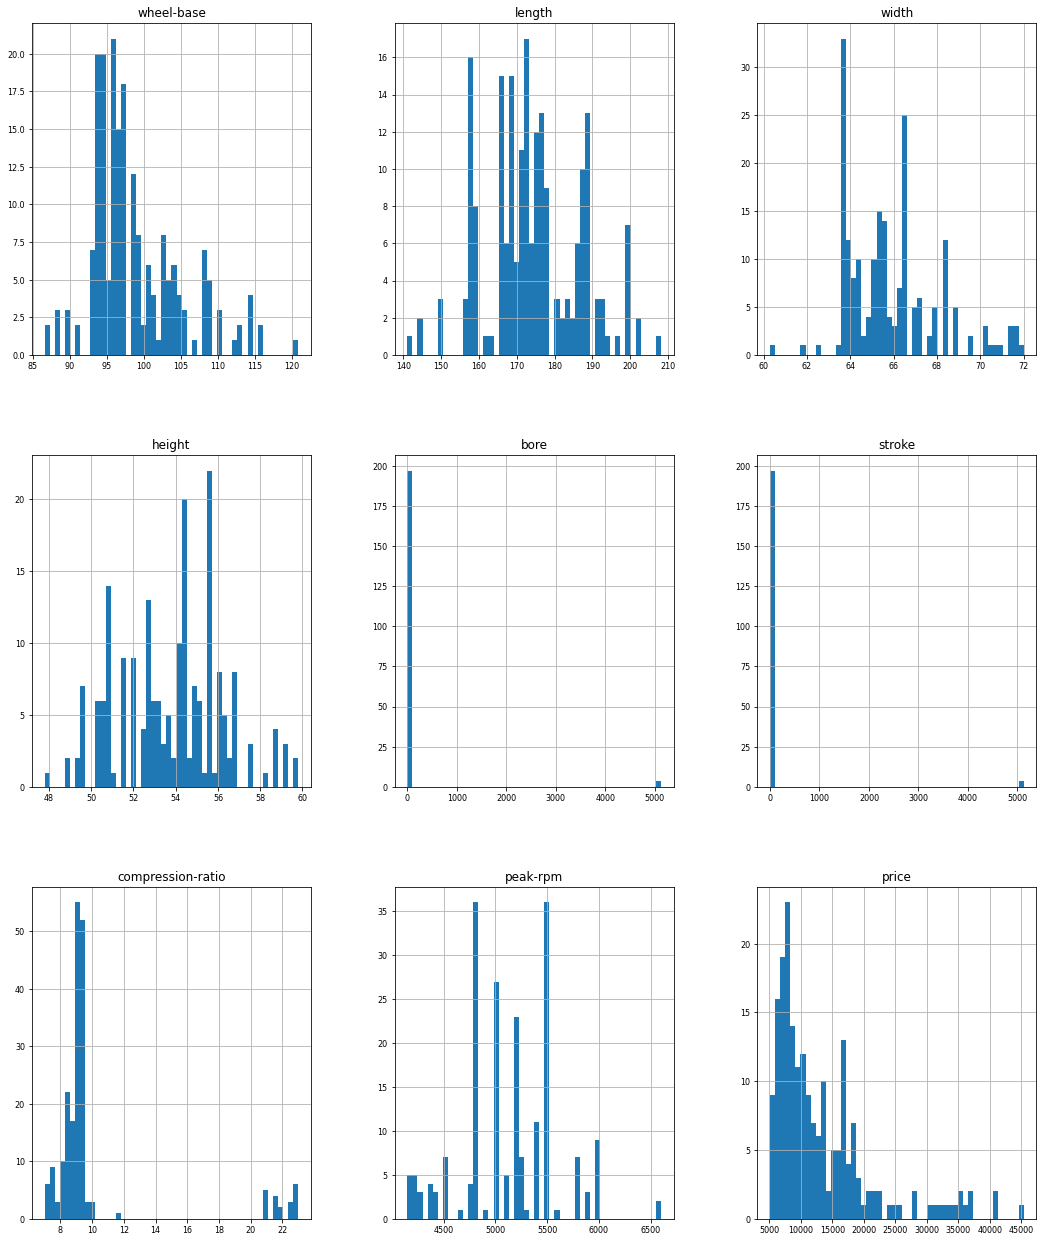

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corr = dataset.corr()

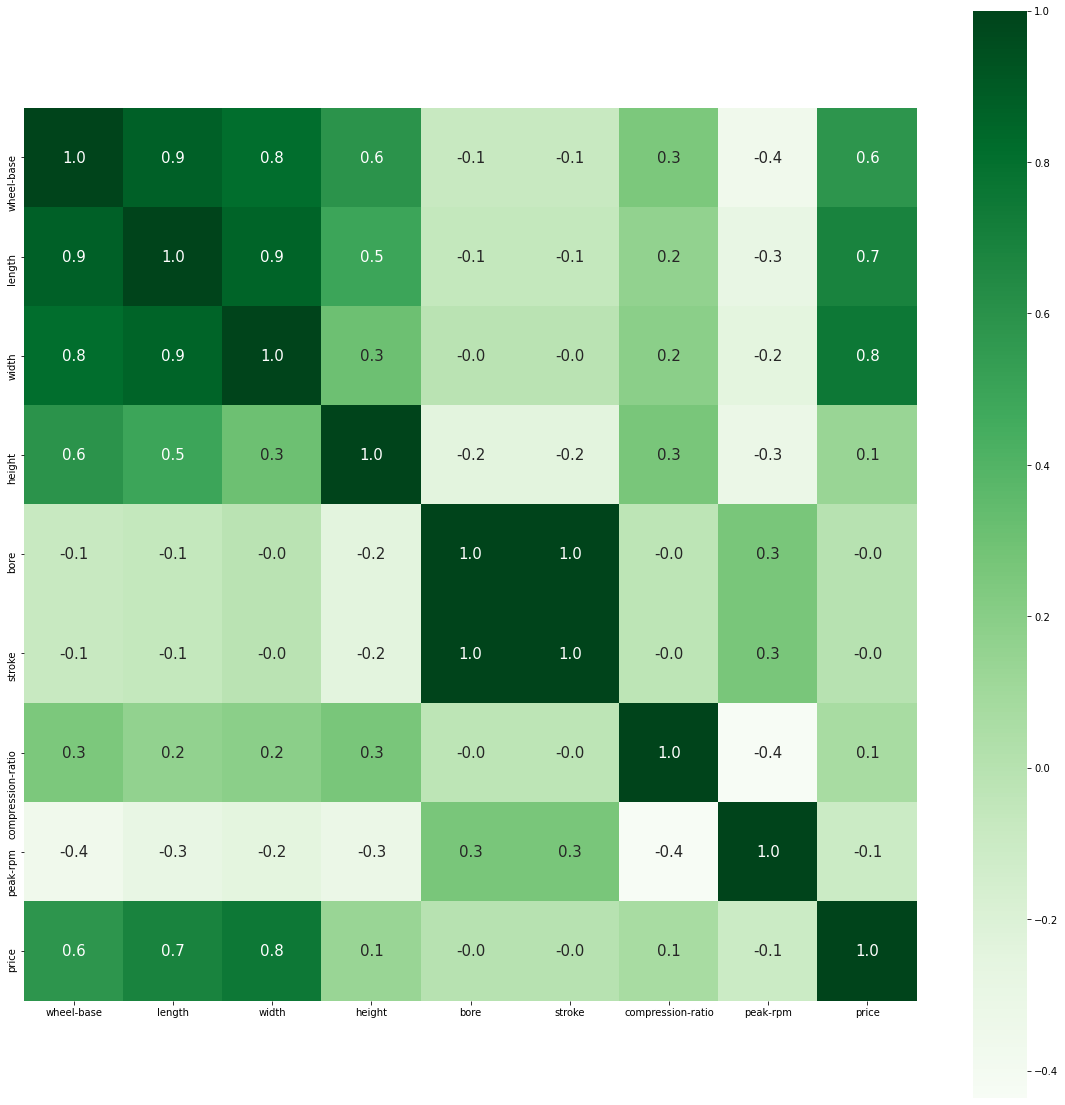

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Linear Regression

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

## Feature Engineering

In [ ]:
label = dataset['price']
features = dataset.drop(['price'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) :  0.19539566175657602
MAE (Mean Absolute Error) :  0.34521356966001887
r^2 score :  0.727147693129617
RMSE (Root Mean Squared Error :  0.4420358150156795


## Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_baseline = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 6ms/step - loss: 1.0632 - val_loss: 0.7086
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 1.0331 - val_loss: 0.6898
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9980 - val_loss: 0.6633
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.9495 - val_loss: 0.6277
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.8797 - val_loss: 0.5855
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8057 - val_loss: 0.5365
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7205 - val_loss: 0.4945
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6458 - val_loss: 0.4621
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5929 - val_loss: 0.4351
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5480 - val_loss: 0.4137
Epoch 11/50
20/20 [

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.20092807537323198
MAE (Mean Absolute Error) :  0.34619503330736073
r^2 score :  0.7194221796545723
RMSE (Root Mean Squared Error :  0.4482500143594331


In [ ]:
history_baseline_dataframe = pd.DataFrame(history_baseline.history)
history_baseline_dataframe['epoch'] = history_baseline.epoch
history_baseline_dataframe

,loss,val_loss,epoch
0,1.063189,0.708607,0
1,1.033120,0.689775,1
2,0.997965,0.663331,2
3,0.949549,0.627722,3
4,0.879672,0.585510,4
5,0.805743,0.536499,5
6,0.720528,0.494487,6
7,0.645756,0.462085,7
8,0.592858,0.435062,8
9,0.548013,0.413682,9


In [ ]:
history_baseline_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
48,0.349688,0.200217,48
49,0.347029,0.200928,49
47,0.350018,0.202919,47
46,0.352800,0.204110,46
45,0.353434,0.205724,45
44,0.355396,0.206981,44
43,0.357953,0.207638,43
42,0.359400,0.209627,42
41,0.361204,0.211989,41
40,0.364836,0.214090,40


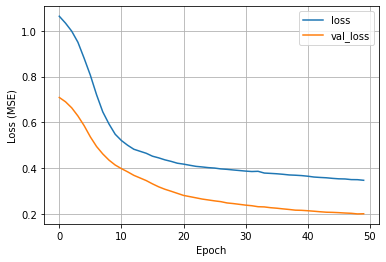

In [ ]:
plot_loss(history_baseline)

## Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_deeper = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 5ms/step - loss: 1.0692 - val_loss: 0.7188
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0624 - val_loss: 0.7131
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0453 - val_loss: 0.7009
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0188 - val_loss: 0.6784
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9617 - val_loss: 0.6433
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8850 - val_loss: 0.5950
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7803 - val_loss: 0.5425
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6850 - val_loss: 0.4931
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6133 - val_loss: 0.4516
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5487 - val_loss: 0.4093
Epoch 11/50
20/20 [

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.21309669160895633
MAE (Mean Absolute Error) :  0.35236129373384334
r^2 score :  0.702429811546246
RMSE (Root Mean Squared Error :  0.46162397209087436


In [ ]:
history_deeper_dataframe = pd.DataFrame(history_deeper.history)
history_deeper_dataframe['epoch'] = history_deeper.epoch
history_deeper_dataframe

,loss,val_loss,epoch
0,1.069172,0.718833,0
1,1.062366,0.713126,1
2,1.045262,0.700926,2
3,1.018777,0.678432,3
4,0.961673,0.643286,4
5,0.884971,0.594983,5
6,0.780323,0.542535,6
7,0.685033,0.493111,7
8,0.613291,0.451628,8
9,0.548720,0.409313,9


In [ ]:
history_deeper_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
48,0.373619,0.212381,48
49,0.372148,0.213097,49
46,0.373673,0.214523,46
47,0.372621,0.214697,47
44,0.377093,0.215363,44
45,0.374840,0.215876,45
43,0.377748,0.217631,43
42,0.378280,0.218163,42
41,0.379321,0.219507,41
40,0.386056,0.220443,40


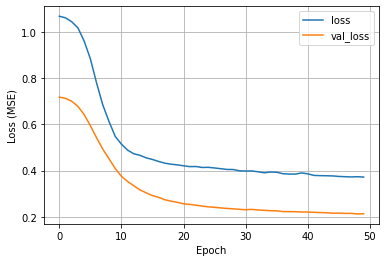

In [ ]:
plot_loss(history_deeper)

## Wider Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

wider_model = Sequential()
wider_model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_wider = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 1.0592 - val_loss: 0.6921
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0109 - val_loss: 0.6584
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9447 - val_loss: 0.6189
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8674 - val_loss: 0.5686
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7836 - val_loss: 0.5143
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.4715
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6170 - val_loss: 0.4332
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5603 - val_loss: 0.4017
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5241 - val_loss: 0.3736
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4999 - val_loss: 0.3531
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.16520349419144495
MAE (Mean Absolute Error) :  0.3048281991760377
r^2 score :  0.7693083147908393
RMSE (Root Mean Squared Error :  0.4064523270833185


In [ ]:
history_wider_dataframe = pd.DataFrame(history_wider.history)
history_wider_dataframe['epoch'] = history_wider.epoch
history_wider_dataframe

,loss,val_loss,epoch
0,1.059160,0.692107,0
1,1.010938,0.658433,1
2,0.944695,0.618855,2
3,0.867401,0.568567,3
4,0.783627,0.514295,4
...,...,...,...
95,0.265675,0.165431,95
96,0.266438,0.164066,96
97,0.266879,0.164432,97
98,0.265844,0.162948,98


In [ ]:
history_wider_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
75,0.285820,0.159088,75
74,0.285955,0.159234,74
73,0.287377,0.159829,73
79,0.278142,0.160598,79
84,0.276626,0.160651,84
...,...,...,...
4,0.783627,0.514295,4
3,0.867401,0.568567,3
2,0.944695,0.618855,2
1,1.010938,0.658433,1


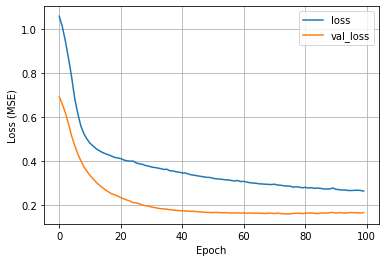

In [ ]:
plot_loss(history_wider)

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0828 - val_loss: 0.7153
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0488 - val_loss: 0.6989
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0138 - val_loss: 0.6761
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9618 - val_loss: 0.6456
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8932 - val_loss: 0.6019
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7901 - val_loss: 0.5493
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6811 - val_loss: 0.4974
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6002 - val_loss: 0.4557
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5392 - val_loss: 0.4213
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5094 - val_loss: 0.3978
Epoch 11/

In [ ]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.16271595664889596
MAE (Mean Absolute Error) :  0.3093446554942028
r^2 score :  0.7727819351916686
RMSE (Root Mean Squared Error :  0.4033806597358083


In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
98,0.319191,0.160505,98
93,0.326990,0.162139,93
96,0.320851,0.162141,96
99,0.316069,0.162716,99
97,0.320095,0.163095,97
...,...,...,...
4,0.893151,0.601894,4
3,0.961842,0.645649,3
2,1.013826,0.676116,2
1,1.048764,0.698935,1


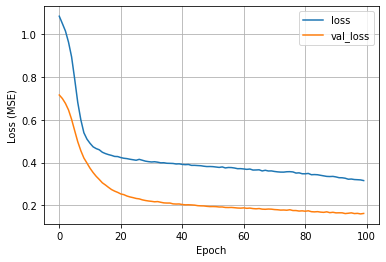

In [ ]:
plot_loss(history_tuned)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0455 - val_loss: 0.6897
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9888 - val_loss: 0.6612
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9246 - val_loss: 0.6266
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8547 - val_loss: 0.5876
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7708 - val_loss: 0.5449
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6967 - val_loss: 0.5098
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6365 - val_loss: 0.4769
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5892 - val_loss: 0.4487
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5526 - val_loss: 0.4258
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5237 - val_loss: 0.4049
Epoch 11/

In [ ]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.18199713278854177
MAE (Mean Absolute Error) :  0.32460199732776956
r^2 score :  0.7458575227375651
RMSE (Root Mean Squared Error :  0.42661121971713517


In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
99,0.337147,0.181997,99
97,0.339078,0.183690,97
96,0.339814,0.183887,96
98,0.336708,0.183933,98
93,0.339904,0.183954,93
...,...,...,...
4,0.770751,0.544922,4
3,0.854730,0.587592,3
2,0.924636,0.626646,2
1,0.988822,0.661162,1


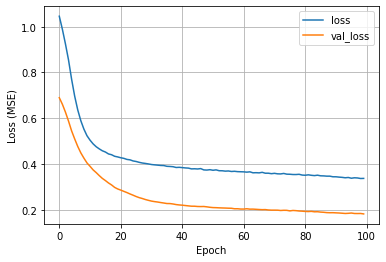

In [ ]:
plot_loss(history_rmsprop)

## Kesimpulan

Dari data di atas, didapatkan hasil :

- Normal Linear Regression
MSE (Mean Squared Error) :  0.19539566175657602
MAE (Mean Absolute Error) :  0.34521356966001887
r^2 score :  0.727147693129617
RMSE (Root Mean Squared Error :  0.4420358150156795

- Baseline Model
MSE (Mean Squared Error) :  0.20092807537323198
MAE (Mean Absolute Error) :  0.34619503330736073
r^2 score :  0.7194221796545723
RMSE (Root Mean Squared Error :  0.4482500143594331

- Deeper Model
MSE (Mean Squared Error) :  0.21309669160895633
MAE (Mean Absolute Error) :  0.35236129373384334
r^2 score :  0.702429811546246
RMSE (Root Mean Squared Error :  0.46162397209087436

- Wider Model Adam
MSE (Mean Squared Error) :  0.16520349419144495
MAE (Mean Absolute Error) :  0.3048281991760377
r^2 score :  0.7693083147908393
RMSE (Root Mean Squared Error :  0.4064523270833185

- Wider Model SGD
MSE (Mean Squared Error) :  0.16271595664889596
MAE (Mean Absolute Error) :  0.3093446554942028
r^2 score :  0.7727819351916686
RMSE (Root Mean Squared Error :  0.4033806597358083

- Wider Model Rmsprop
MSE (Mean Squared Error) :  0.18199713278854177
MAE (Mean Absolute Error) :  0.32460199732776956
r^2 score :  0.7458575227375651
RMSE (Root Mean Squared Error :  0.42661121971713517


Dari data di atas, hasil r^2 score dan MSE terbaik didapatkan oleh algoritma Wider Model SGD. Hal ini menunjukan model algoritma yang cocok pada dataset ini adalah Wider Model SGD. Dataset Auto termasuk dataset yang sudah baik, karena setiap algoritma yang dijalankan menghasilkan epoch yang baik dimana validation loss underfit terhadap loss trainingnya.